In [39]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader,TensorDataset
import  torchvision.transforms as transforms
import numpy as np
import pandas as pd

from os import listdir
from os.path import isfile, join
# import data_proses
import argparse
import yaml
with open(r'/home/robotics20/Documents/rotem/new_code/config.yaml', 'r') as f:
    args = yaml.safe_load(f)

config = argparse.Namespace(**args)


df = pd.read_csv(r'/home/robotics20/Documents/rotem/new_code/data/data/02_Aug_2023_11_46_clean.csv')

In [48]:
# df_toclean = df.drop(['sesion_time_stamp'],axis=1)
df_toclean =df.copy()
df_toclean[config.fmg_index] = df_toclean[config.fmg_index].rolling(window=30, axis=0).mean()



In [45]:
df_toclean

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z,sesion_time_stamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.165711,0.444267,-0.002644,-1.035941,0.639871,0.351186,-0.949573,0.595297,0.148495,02_Aug_2023_11_46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.165709,0.444268,-0.002627,-1.035923,0.640024,0.351187,-0.949682,0.595317,0.148512,02_Aug_2023_11_46
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.165709,0.444268,-0.002627,-1.035923,0.640024,0.351187,-0.949682,0.595317,0.148512,02_Aug_2023_11_46
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.165699,0.444269,-0.002610,-1.035958,0.640185,0.351439,-0.949748,0.595351,0.148516,02_Aug_2023_11_46
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.165699,0.444269,-0.002610,-1.035958,0.640185,0.351439,-0.949748,0.595351,0.148516,02_Aug_2023_11_46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,15.400000,0.733333,2.000000,0.833333,8.433333,3.733333,15.766667,11.700000,55.833333,3.466667,...,-1.084092,0.430447,0.029243,-0.676854,0.560988,0.266750,-0.751880,0.544860,0.061399,02_Aug_2023_11_46
9979,15.266667,0.733333,1.833333,0.833333,8.466667,3.666667,15.566667,11.300000,55.700000,3.500000,...,-1.083843,0.430472,0.029669,-0.667472,0.559992,0.260276,-0.748152,0.544719,0.056930,02_Aug_2023_11_46
9980,15.133333,0.766667,1.866667,0.833333,8.233333,3.600000,15.300000,10.933333,55.533333,3.566667,...,-1.083539,0.430476,0.030116,-0.658048,0.559245,0.253694,-0.744623,0.544398,0.052567,02_Aug_2023_11_46
9981,14.900000,0.733333,1.733333,0.700000,8.000000,3.500000,15.033333,10.433333,55.700000,3.600000,...,-1.083202,0.430363,0.030523,-0.648894,0.558111,0.246816,-0.741194,0.544067,0.048335,02_Aug_2023_11_46


In [49]:
df_toclean = df_toclean.dropna().reset_index(drop=True)
df_toclean

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z,sesion_time_stamp
0,6.600000,2.433333,2.700000,0.700000,3.866667,3.700000,29.200000,15.533333,33.200000,6.366667,...,-1.165599,0.444300,-0.002472,-1.036945,0.640943,0.350879,-0.950109,0.595769,0.148578,02_Aug_2023_11_46
1,6.633333,2.433333,2.766667,0.700000,3.800000,3.500000,28.933333,15.566667,33.533333,6.400000,...,-1.165594,0.444302,-0.002459,-1.036961,0.641025,0.350831,-0.950107,0.595804,0.148566,02_Aug_2023_11_46
2,6.733333,2.400000,2.666667,0.700000,3.800000,3.333333,28.800000,15.500000,33.800000,6.433333,...,-1.165594,0.444302,-0.002459,-1.036961,0.641025,0.350831,-0.950107,0.595804,0.148566,02_Aug_2023_11_46
3,7.000000,2.400000,2.733333,0.700000,3.900000,3.333333,28.700000,15.466667,33.733333,6.433333,...,-1.165598,0.444302,-0.002434,-1.037000,0.641147,0.350803,-0.950203,0.595855,0.148602,02_Aug_2023_11_46
4,7.166667,2.400000,2.600000,1.100000,3.966667,3.466667,28.700000,15.566667,33.766667,6.433333,...,-1.165598,0.444302,-0.002434,-1.037000,0.641147,0.350803,-0.950203,0.595855,0.148602,02_Aug_2023_11_46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,15.400000,0.733333,2.000000,0.833333,8.433333,3.733333,15.766667,11.700000,55.833333,3.466667,...,-1.084092,0.430447,0.029243,-0.676854,0.560988,0.266750,-0.751880,0.544860,0.061399,02_Aug_2023_11_46
9949,15.266667,0.733333,1.833333,0.833333,8.466667,3.666667,15.566667,11.300000,55.700000,3.500000,...,-1.083843,0.430472,0.029669,-0.667472,0.559992,0.260276,-0.748152,0.544719,0.056930,02_Aug_2023_11_46
9950,15.133333,0.766667,1.866667,0.833333,8.233333,3.600000,15.300000,10.933333,55.533333,3.566667,...,-1.083539,0.430476,0.030116,-0.658048,0.559245,0.253694,-0.744623,0.544398,0.052567,02_Aug_2023_11_46
9951,14.900000,0.733333,1.733333,0.700000,8.000000,3.500000,15.033333,10.433333,55.700000,3.600000,...,-1.083202,0.430363,0.030523,-0.648894,0.558111,0.246816,-0.741194,0.544067,0.048335,02_Aug_2023_11_46


<AxesSubplot: >

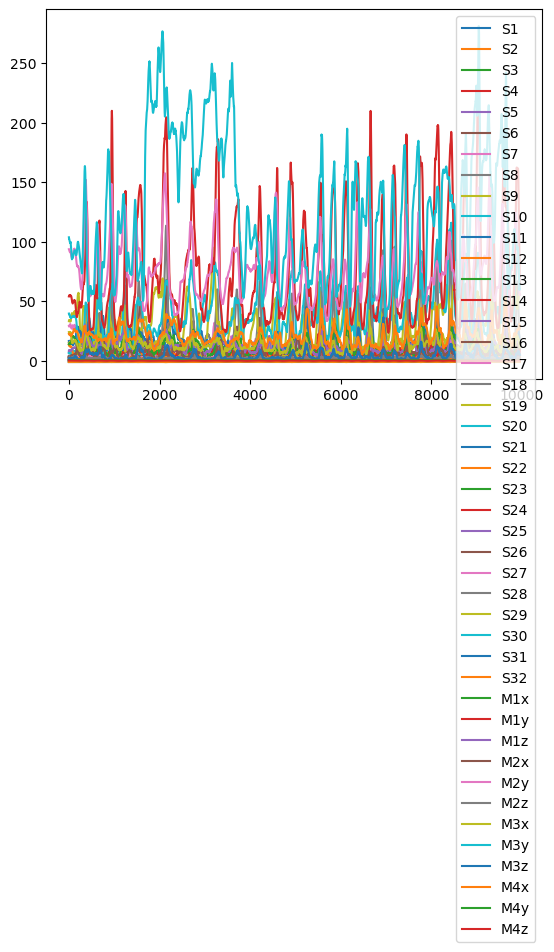

In [50]:
df_toclean.plot()

In [11]:

def is_not_numeric(x):
    try:
        float(x)
        return False
    except ValueError:
        return True
    

def print_not_numeric_vals(df):

    mask = df.drop(['sesion_time_stamp'],axis=1)[config.fmg_index+config.first_positoin_label_inedx].applymap(is_not_numeric)
    non_numeric_values = df[mask].stack().dropna()
    print(non_numeric_values)

    return non_numeric_values    

In [15]:
non = print_not_numeric_vals(df)


943   M3x    02_Aug_2023_11_46
1319  S16              0.03.00
      M3z    02_Aug_2023_11_46
1485  M2x    02_Aug_2023_11_46
1974  M4z    02_Aug_2023_11_46
2115  M4x    02_Aug_2023_11_46
2640  M1x    02_Aug_2023_11_46
3284  M3z    02_Aug_2023_11_46
5473  S11              10.1.00
      M3y    02_Aug_2023_11_46
5725  S19                1..00
      M3x    02_Aug_2023_11_46
6614  S6              5.001.00
      M1x    02_Aug_2023_11_46
7032  S30    02_Aug_2023_11_46
7730  M4y    02_Aug_2023_11_46
9024  M4z    02_Aug_2023_11_46
9369  M1y    02_Aug_2023_11_46
9674  M3x    02_Aug_2023_11_46
dtype: object


In [25]:
x = non.index.to_numpy()

In [ ]:
for i in range(len(x)):
    print(x[i][0])
    

In [40]:
index_list = [x[i][0] for i in range(len(x)) ]

index_list

[943,
 1319,
 1319,
 1485,
 1974,
 2115,
 2640,
 3284,
 5473,
 5473,
 5725,
 5725,
 6614,
 6614,
 7032,
 7730,
 9024,
 9369,
 9674]

In [43]:
y = df.drop(index_list).reset_index(drop=True)

In [45]:
print_not_numeric_vals(y)

Series([], dtype: object)


Series([], dtype: object)

In [49]:
import pandas as pd

data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv('data.csv', index=False)
